#### What happens when you call nlp?

You've already written this plenty of times by now: pass a string of text to the nlp object, and receive a Doc object.

But what does the nlp object actually do?

First, the tokenizer is applied to turn the string of text into a Doc object. Next, a series of pipeline components is applied to the doc in order. In this case, the tagger, then the parser, then the entity recognizer. Finally, the processed doc is returned, so you can work with it.

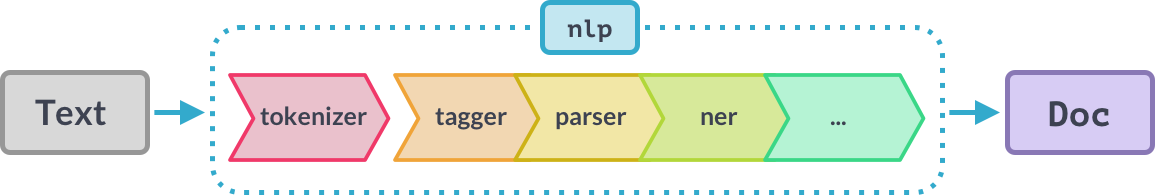

#### Built in pipeline components

spaCy ships with a variety of built-in pipeline components. Here are some of the most common ones that you'll want to use in your projects.

The part-of-speech tagger sets the token.tag and token.pos attributes.

The dependency parser adds the token.dep and token.head attributes and is also responsible for detecting sentences and base noun phrases, also known as noun chunks.

The named entity recognizer adds the detected entities to the doc.ents property. It also sets entity type attributes on the tokens that indicate if a token is part of an entity or not.

Finally, the text classifier sets category labels that apply to the whole text, and adds them to the doc.cats property.

Because text categories are always very specific, the text classifier is not included in any of the trained pipelines by default. But you can use it to train your own system.

|Name|Description|Creates|
|-|-|-|
|tagger|Part-of-speech tagger|Token.tag, Token.pos|
|parser|Dependency parser|Token.dep, Token.head, Doc.sents, Doc.noun_chunks|
|ner|Named entity recognizer|Doc.ents, Token.ent_iob, Token.ent_type|
|textcat|Text classifier|Doc.cats|

#### Under the hood

All pipeline packages you can load into spaCy include several files and a config.cfg.

The config defines things like the language and pipeline. This tells spaCy which components to instantiate and how they should be configured.

The built-in components that make predictions also need binary data. The data is included in the pipeline package and loaded into the component when you load the pipeline.

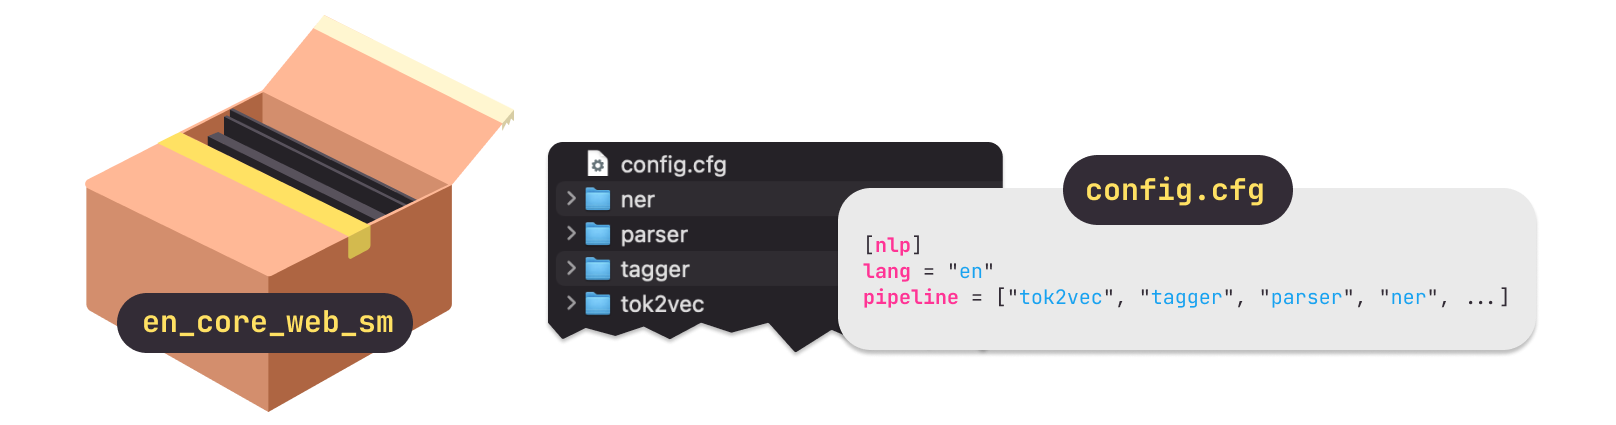

- Pipeline defined in model's config.cfg in order
- Built-in components need binary data to make predictions

#### Pipeline attributes

To see the names of the pipeline components present in the current nlp object, you can use the nlp.pipe_names attribute.

For a list of component name and component function tuples, you can use the nlp.pipeline attribute.

The component functions are the functions applied to the doc to process it and set attributes – for example, part-of-speech tags or named entities.

In [2]:
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")

In [6]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [7]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7fe398a6d2a0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fe398a6d120>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fe398dc25e0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fe398ab0340>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fe399a3aa80>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fe398dc27a0>)]